# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 20th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

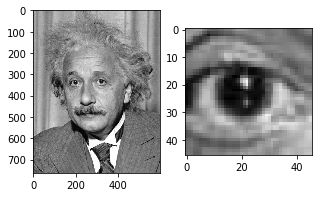

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_float ,color
from skimage.feature import match_template
%matplotlib inline



eye=io.imread('./images/eye.png')
einstein=io.imread('./images/einstein.png')

f, axarr = plt.subplots(ncols=2,figsize=(5,5))

axarr[0].imshow(einstein, cmap='gray')
axarr[1].imshow(eye, cmap='gray')

plt.show()

Create a function for applying euclidean distance and normalized cross-correlation and display the results in this format:
    
<img src="images_notebook/template_matching.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 

Use titles of the figures to explain what is displayed.


In [2]:
def template_matching_euclidean_distance(image, template):
    """
    This function takes an image and a template and using the euclidean distance finds the template in the image
    params: image, template
    return: the image filtered and the detection
    """
    max_x = image.shape[1]
    max_y = image.shape[0]
    max_template_x = template.shape[0]
    max_template_y = template.shape[1]
    
    image = color.rgb2gray(image)
    template = color.rgb2gray(template)
    
    
    result = np.zeros((image.shape[0]-template.shape[0],image.shape[1]-template.shape[1]), dtype=np.float64)
    
    for i in range( max_y - max_template_y ):
        for j in range(max_x - max_template_x ):
            result[i,j] = np.linalg.norm(image[i:i+max_template_x,j:j+max_template_y]-template[:,:])
                                         
    template_result = result.copy()                                 
    template_result = template_result < (np.min(template_result)*4)
    
    return result, template_result
    
    
def template_matching_crosscorelation(image, template):
    """
    This function takes an image and a template and using the normalized cross-correlation finds the template in the image
    params: image, template
    return: the image filtered and the detection
    """
    image = color.rgb2gray(image)
    template = color.rgb2gray(template)
    result = match_template(image,template)
    template_result = result.copy()
    template_result = template_result > (np.max(template_result)/1.4)
    
    return result, template_result

1.2 Display the results on `einstein_br.png`:

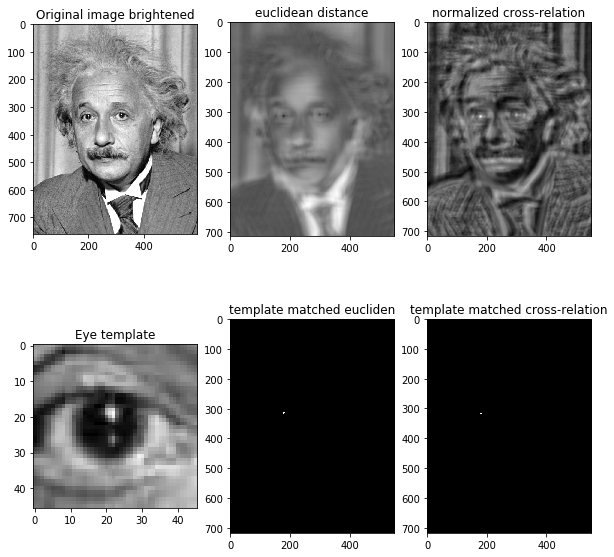

In [3]:
einstein_br = io.imread("images/einstein_br.png")
eye = io.imread("images/eye.png")

euclidean = template_matching_euclidean_distance(einstein, eye)
cross = template_matching_crosscorelation(einstein,eye)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein_br, cmap='gray')
axarr[0][0].set_title('Original image brightened')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(eye, cmap='gray')
axarr[1][0].set_title('Eye template')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')


plt.show()


1.3 Display the results on `einstein_mask.png`:

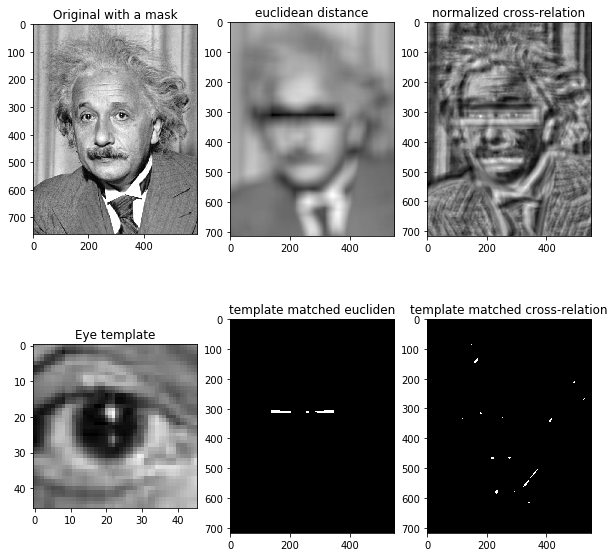

In [4]:
einstein_mask = io.imread("images/einstein_mask.png")
eye = io.imread("images/eye.png")

euclidean = template_matching_euclidean_distance(einstein_mask, eye)
cross = template_matching_crosscorelation(einstein_mask,eye)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein_br, cmap='gray')
axarr[0][0].set_title('Original with a mask')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(eye, cmap='gray')
axarr[1][0].set_title('Eye template')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')


plt.show()

1.4.
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

#### How does the minimum distance between the template and the image change? 
- TODO

#### What are the minimal distance pixels in the correlation images?
- TODO

#### What are the distances between the template and the image around the eyes of the image?
- TODO


1.5 How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

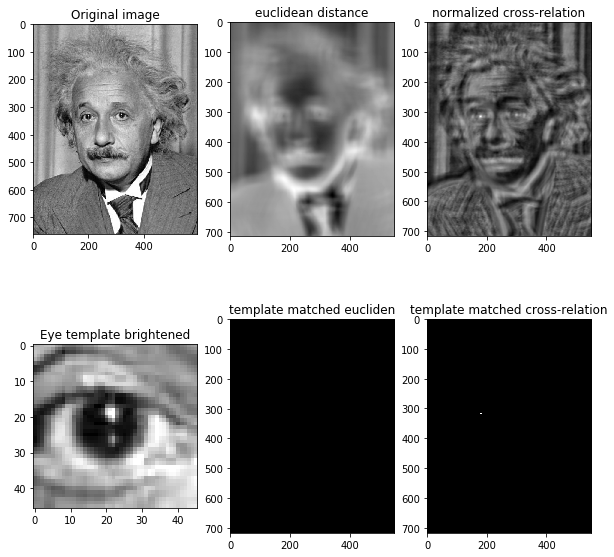

In [5]:
einstein = io.imread("images/einstein.png")
eye_br = io.imread("images/eye_br.png")

euclidean = template_matching_euclidean_distance(einstein, eye_br)
cross = template_matching_crosscorelation(einstein,eye_br)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein, cmap='gray')
axarr[0][0].set_title('Original image')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(eye_br, cmap='gray')
axarr[1][0].set_title('Eye template brightened')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')
plt.show()

#### How the result changes if we increase or decrease the contrast from the image/template?

- When we pass a template wich contrast has been increased or decreased (in this case, the template is brighter) we've noticed that euclidean distance method used for template matching doesn't return any detection. Instead, the normalized cross-correlation keeps returning the detection like in the first case

1.6 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

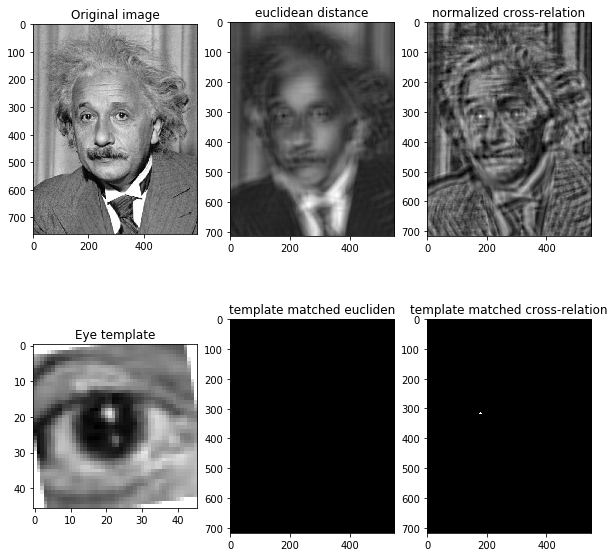

In [6]:
from skimage.transform import rotate

einstein = io.imread('images/einstein.png')
rotated_eye = io.imread('images/eye.png')
##TEST FOR 10 DEGREES ROTATION
rotated_eye_10 = rotate(rotated_eye, 10)

euclidean = template_matching_euclidean_distance(einstein, rotated_eye_10)
cross = template_matching_crosscorelation(einstein,rotated_eye_10)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein, cmap='gray')
axarr[0][0].set_title('Original image')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(rotated_eye_10, cmap='gray')
axarr[1][0].set_title('Eye template')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')
plt.show()

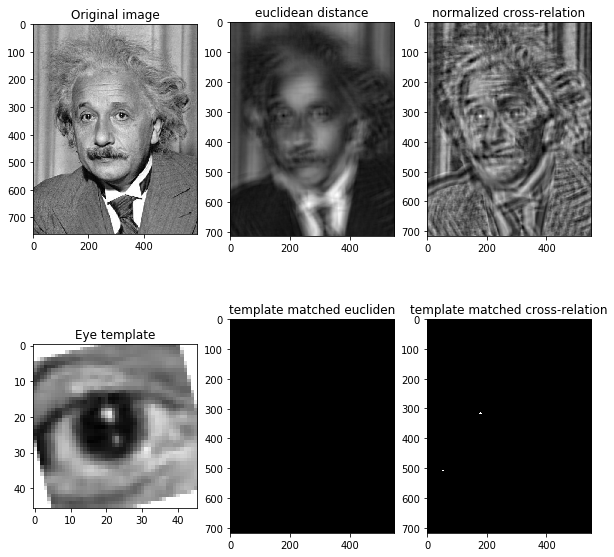

In [7]:
##Test for 15 degrees rotation
rotated_eye_15 = rotate(rotated_eye, 15)

euclidean = template_matching_euclidean_distance(einstein, rotated_eye_15)
cross = template_matching_crosscorelation(einstein,rotated_eye_15)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein, cmap='gray')
axarr[0][0].set_title('Original image')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(rotated_eye_15, cmap='gray')
axarr[1][0].set_title('Eye template')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')
plt.show()

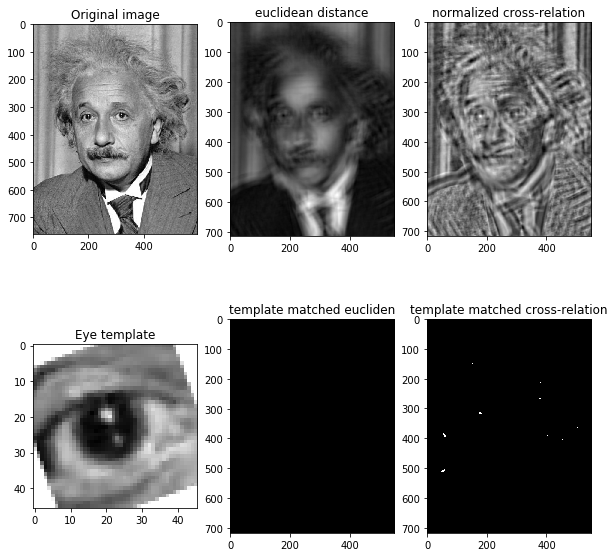

In [8]:
##Test for 20 degrees rotation
rotated_eye_20 = rotate(rotated_eye, 20)

euclidean = template_matching_euclidean_distance(einstein, rotated_eye_20)
cross = template_matching_crosscorelation(einstein, rotated_eye_20)

f, axarr = plt.subplots(ncols=3,nrows=2,figsize=(10,10))
axarr[0][0].imshow(einstein, cmap='gray')
axarr[0][0].set_title('Original image')
axarr[0][1].imshow(euclidean[0],cmap='gray')
axarr[0][1].set_title('euclidean distance')
axarr[0][2].imshow(cross[0],cmap='gray')
axarr[0][2].set_title('normalized cross-relation')
axarr[1][0].imshow(rotated_eye_20, cmap='gray')
axarr[1][0].set_title('Eye template')
axarr[1][1].imshow(euclidean[1],cmap='gray')
axarr[1][1].set_title('template matched eucliden')
axarr[1][2].imshow(cross[1],cmap='gray')
axarr[1][2].set_title('template matched cross-relation')
plt.show()

#### How the result changes if the template is rotated?

- We've observed that if we rotate the template the euclidean distance method does not find any match, but the normalized cross-correlation method does find the match but also finds some other false positive. 

1.7 Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

#### What is the template matching process?
- The template matching process is a technique that allow us to find some item in an image. For example, if we have an eye and a photography of a face, we could use this technique to identify where the eyes are.

#### Advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions.
- The advantages are clear, we could use this technique to track an item in real time. The most common example is eye tracking, wich allows us to know where is someone looking at every moment. As disadvantages we must say that the euclidean distance method is very sensible to some changes, for example changes on contrast or rotation of the template. Instead the normalised cross-correlation method is safer because it's less sensitive to changes on contrast or rotation, but we could get some false positives.

#### What parameters it has and which measure for image comparisons works better?
- Both methods needs as parameters the image where we are going to look for a specific item and a template, to know what we are looking for in the image. When we use the euclidean distance method we have to search the minimums values from the result matrix to know where the positives are. In the other hand, when we use the cross-correlation method we are searching for the maximum values to know where the positives are.

# 2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique.

2.1 Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

Hint: the HOG detector function is in the skimage.feature library. 

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


TypeError: Invalid dimensions for image data

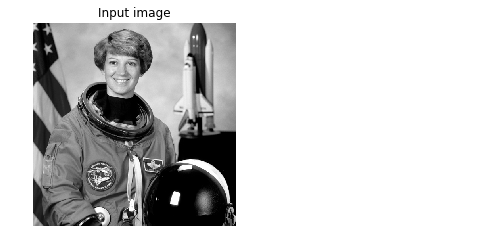

In [165]:
from skimage.feature import hog
from skimage import data, exposure

car = io.imread('images/car_template.png')


image = rgb2gray(data.astronaut())

fd = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

2.2 Apply the HOG descriptor on the complete set of images.

a) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. **In order to accelerate algorithm execution, you must apply a sliding window with a step of X pixels both vertically and horizontally (e.g. X=5).**

b) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results.

Display the results of every car detection and for each distance following this format:

<img src="images_notebook/hog.png" width="800" height="100">

2.3 Count on how many images were the cars detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

Analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

3.1 Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

In [23]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt


def orb_func_image_image(model, scene):
    
    if len(model.shape) == 2:
        raise "This function only works with color images"
    
    if model.shape[2] == 4:
        model = rgba2rgb(model)
        
    if scene.shape[2] == 4:
        scene = rgba2rgb(scene)
    
    
    #scene = starbucks.copy()
    tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                               translation=(0, -200))
    rotated_scene = tf.warp(scene, tform)

    model_gray = rgb2gray(model)
    scene_gray = rgb2gray(scene)
    rotated_scene_gray = rgb2gray(rotated_scene)

    descriptor_extractor = ORB(n_keypoints=200)

    #KEYPOINTS AND DESCRIPTORS FROM STARBUCKS
    descriptor_extractor.detect_and_extract(model_gray)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    #KEYPOINTS AND DESCRIPTORS FROMS SCENE
    descriptor_extractor.detect_and_extract(scene_gray)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    #KEYPOINTS AD DESCRIPTORS FROM THE ROTATED SCENE
    descriptor_extractor.detect_and_extract(rotated_scene_gray)
    keypoints3 = descriptor_extractor.keypoints
    descriptors3 = descriptor_extractor.descriptors

    #MATCHING DESCRIPTORS FROM STARBUCKS AND SCENE
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

    #MATCHING DESCRIPTORS FROM STARBUCKS AND THE ROTATED SCENE
    matches13= match_descriptors(descriptors1, descriptors3, cross_check=True)

    #PLOT RESULT

    fig, ax = plt.subplots(nrows=2, ncols=1)

    plt.gray()

    plot_matches(ax[0], model, scene, keypoints1, keypoints2, matches12)
    ax[0].axis('off')
    ax[0].set_title("Original Image vs. Transformed Image")
    plot_matches(ax[1], model, rotated_scene, keypoints1, keypoints3, matches13)
    ax[1].axis('off')
    ax[1].set_title("Original Image vs. Transformed Image")

    plt.show()

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


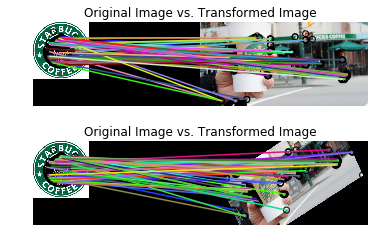

In [24]:
starbucks = io.imread('images/starbucks.jpg')
scene = io.imread('images/starbucks6.jpg')

orb_func_image_image(starbucks, scene)

3.2 Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [11]:
def orb_func_image_collection(model, ic):

    images = []
    
    if len(model.shape) == 2:
        raise "This function only works with color images"

    for i in range(len(ic)):
        if ic[i].shape[2] == 4:
            images.append(rgba2rgb(ic[i]))
        else:
            images.append(ic[i])
    
    if model.shape[2] == 4:
        model = rgba2rgb(model)
     
    model_gray = rgb2gray(model)

    descriptor_extractor = ORB(n_keypoints=200)
    
    #KEYPOINTS AND DESCRIPTORS FROM MODEL IMAGE
    descriptor_extractor.detect_and_extract(model_gray)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    keypoints = []
    descriptors = []
    matches = []

    order = []
    index = 0
    #IN THIS LOOP WE EXTRACT ALL KEYPOINTS AND DESCRIPTORS FROM THE SCENES AND COMPUTE THE MATCHING DESCRIPTORS WITH THE
    #MODEL
    for image in images:

        image_gray = rgb2gray(image)

        descriptor_extractor.detect_and_extract(image_gray)
        keypoints2 = descriptor_extractor.keypoints
        descriptors2 = descriptor_extractor.descriptors
        matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

        order.append((index, matches12,keypoints2,descriptors2))
        index+=1

    order = sorted(order, key=lambda x: len(x[1]), reverse=True)

    fig, ax = plt.subplots(nrows=len(images), ncols=1, figsize=(20,20))

    plt.gray()
    j = 0
    for index, match, keypoints, descriptors in order:
        plot_matches(ax[j], model,images[index], keypoints1, keypoints, match)
        ax[j].axis('off')
        ax[j].set_title("Original Image vs. Transformed Image")
        j+=1


    plt.show()

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


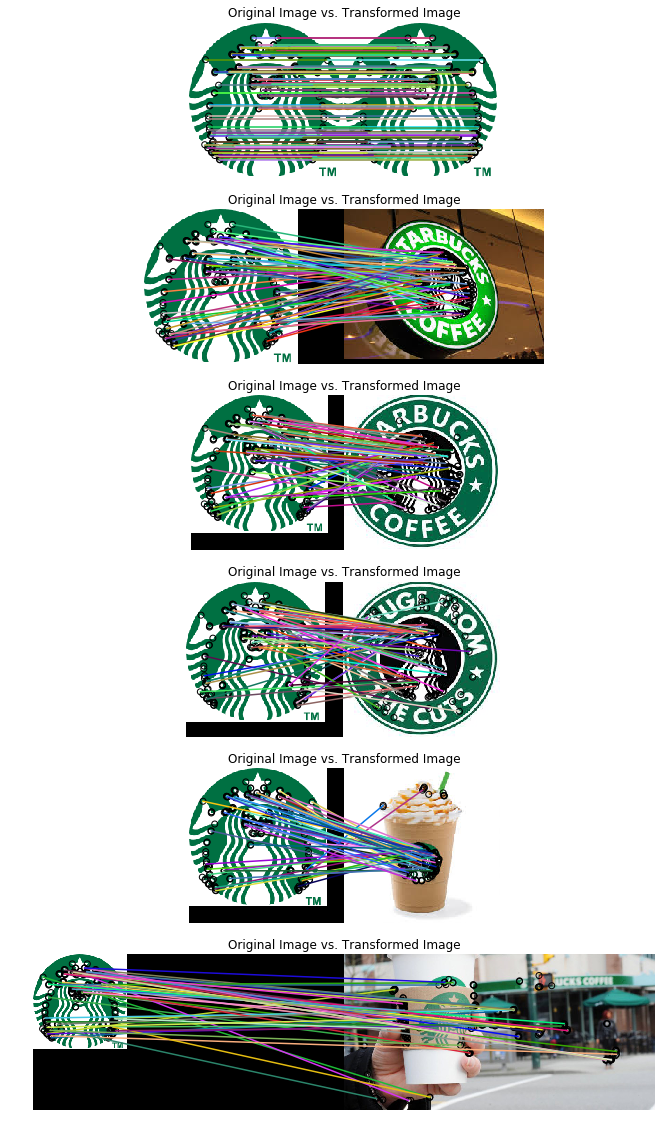

In [12]:
ic = io.imread_collection('images/star*.*')
model = ic[0].copy()
orb_func_image_collection(model, ic)

3.3 Repeate the experiment in 3.2: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


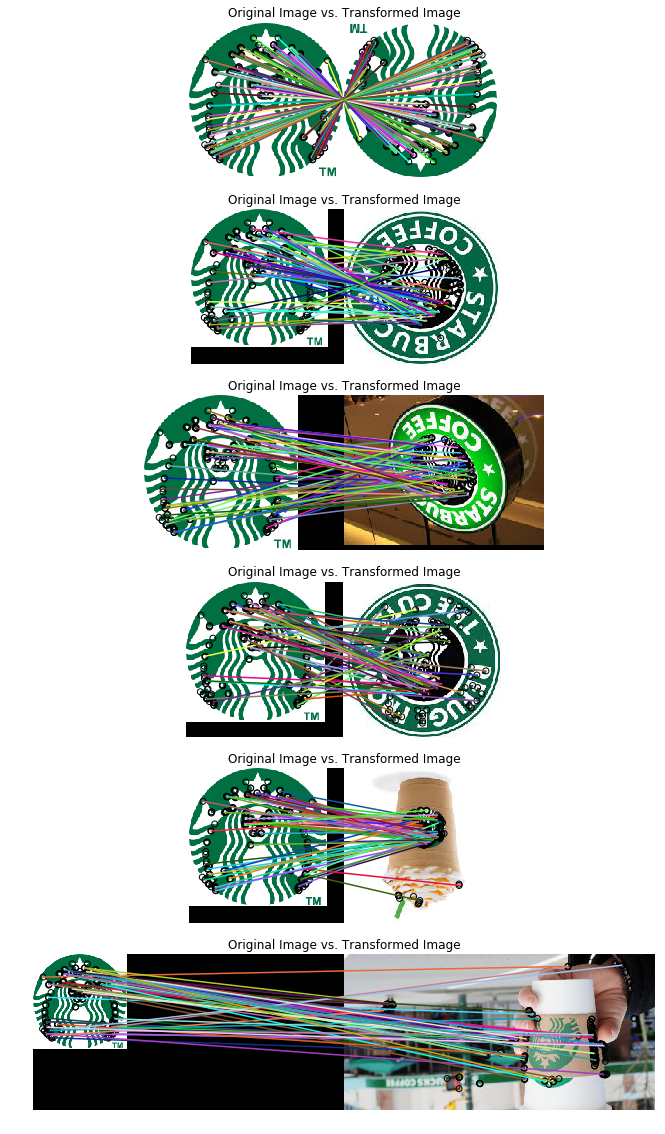

In [13]:
"""To make exercise 3.3 we compare the original model image with all the same pictures of 3.2 but now they are rotated
180 degrees"""

ic = io.imread_collection('images/star*.*')
model = ic[0].copy()
images = []
rotationdegrees = 180
for i in range(len(ic)):
    images.append(tf.rotate(ic[i], rotationdegrees))
    
orb_func_image_collection(model, images)

3.4 **(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



(300, 300, 4)
(376, 500, 3)


/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


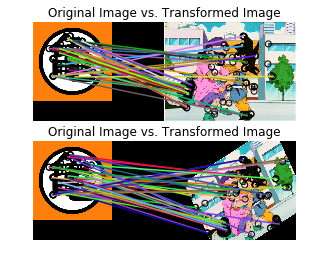

In [25]:
model = io.imread('images/Tortuga.png')
scene = io.imread('images/Tortuga5.jpg')

print(model.shape)
print(scene.shape)

orb_func_image_image(model, scene)

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


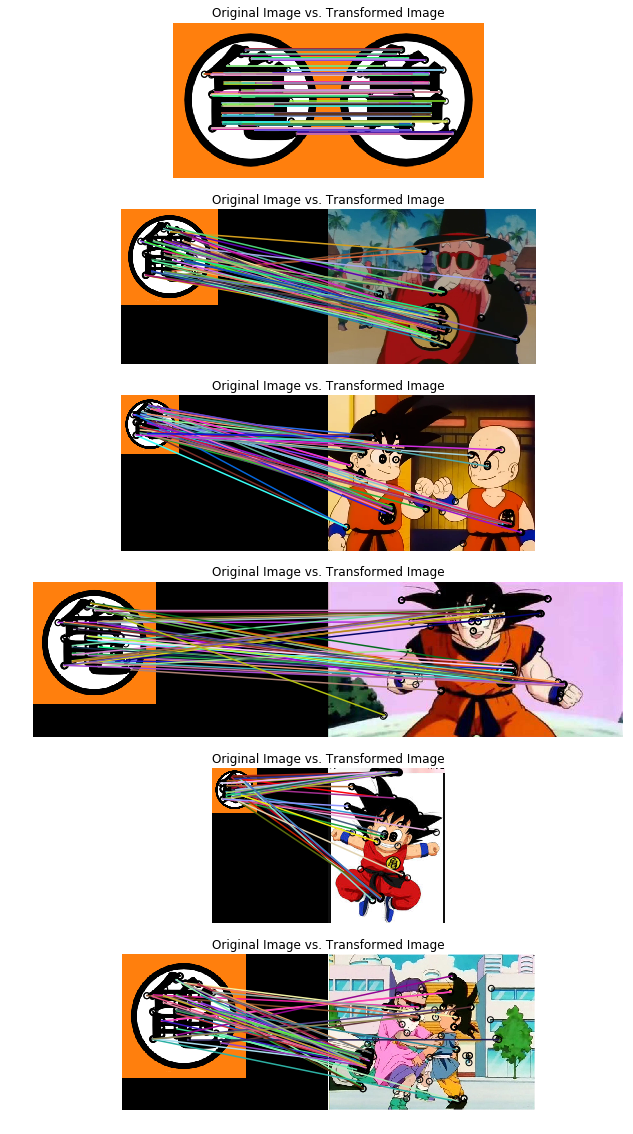

In [26]:
ic = io.imread_collection('images/Tor*.*')
model = ic[5].copy()
orb_func_image_collection(model, ic)

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


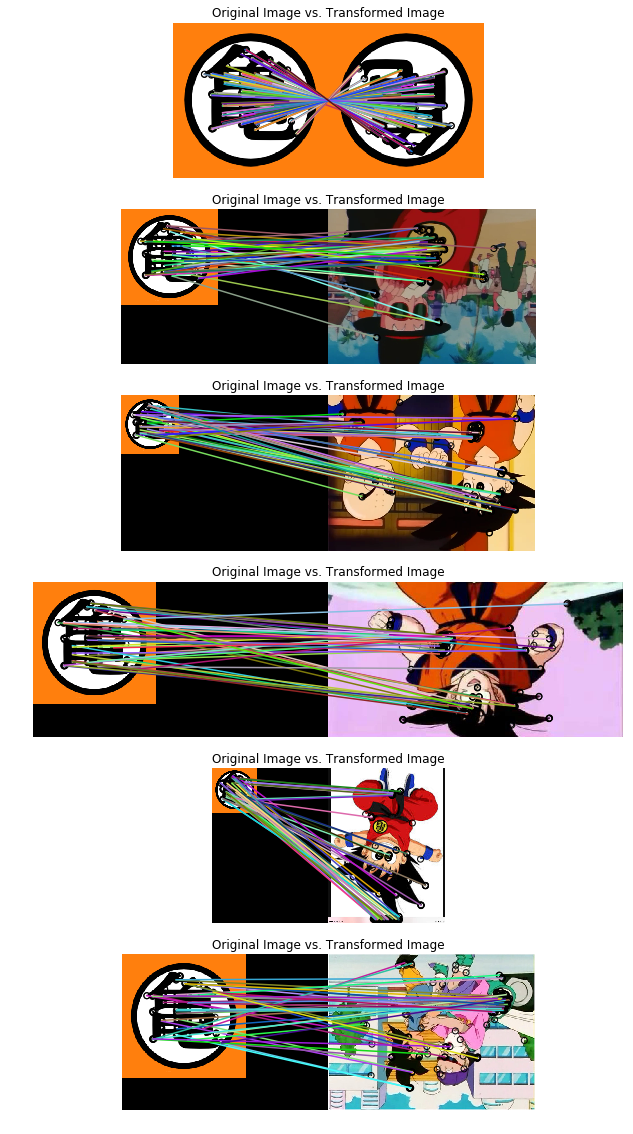

In [27]:
ic = io.imread_collection('images/Tor*.*')
model = ic[5].copy()
images = []
rotationdegrees = 180
for i in range(len(ic)):
    images.append(tf.rotate(ic[i], rotationdegrees))
    
orb_func_image_collection(model, images)

For this optional exercise we've decided to use ORB method to search for symbol of the Turtle School founded by Master Roshi in Dragon Ball series in some scenes and images from the famous anime.  In some images the ORB methos has difficulties to find the symbol but that is due to how the scene was drawn back then.

3.5 Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

#### What are the advantages of the ORB object detection with respect to the HOG and template object detector?
- ORB method compared with HOG and template matching is much faster and is more scale and rotation invariant.

#### What would happen if you analyse an image that does not contain the Starbucks logo?
- If we analyse an image that doesn't contain any starbucks logo, the algorithm will still find some matching points. The total of number of matching points will depend on the analysed image.

#### Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 
- A simple way to define a quality mesure correspondance between two images would be the number of matching points between the two images. Also we can define a threshold and see how many points matched correctly. For example if we define an 80% threshold we consider that two images are equal if the total of valid matching points is above of the threshold.

/home/sora/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


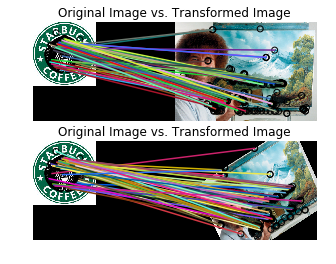

In [30]:
model = io.imread('images/starbucks.jpg')
bob_ross_scene = io.imread('images/Bob-Ross-3.jpg')

orb_func_image_image(model, bob_ross_scene)

### Appendix

In [59]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)